## University Rankings Overview

University rankings are based on different criteria and can vary widely. Here's a brief comparison:

- **Times Higher Education (THE):**  
  Focuses on research, teaching, citations, industry income, and international collaboration.  
  *Criticism:* Tends to favor English-speaking universities and may be influenced by commercial interests.
  
- **Shanghai Ranking (ARWU):**  
  Primarily measures research strength through publications and Nobel laureates.  
  *Criticism:* Often criticized for not considering teaching quality or humanities departments.

- **Center for World University Rankings (CWUR):**  
  A lesser-known ranking system that assesses universities based on research output and faculty quality.  
  *Criticism:* Not as widely recognized, but offers unique perspectives with a focus on raw research data.

### Educational Attainment and Ranking Insights:

The dataset also includes educational attainment levels by country. Analyzing these alongside university rankings could show connections between national education quality and university performance. This can be useful for understanding how educational systems impact global rankings.

### Conclusion:

While rankings provide a snapshot of a university's performance, they have biases and may not capture the full picture. Consider factors beyond rankings, such as academic programs, faculty, campus facilities, and student satisfaction, when evaluating universities.

For more detailed information, visit [this Kaggle dataset](https://www.kaggle.com/datasets/ourfuture/world-university-rankings).


## Import libraries

In [275]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import regex as re
import plotly.express as px
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [169]:
# Reading the data from the files
shanghai_rank = pd.read_excel('shanghai Ranking.xlsx') #ARWU
times_h = pd.read_excel('Times Higher Education.xlsx') #THE
word_rank = pd.read_excel('Word Rank University.xlsx') #CWUR

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [170]:
# Show the shape of each dataframe
print(f"Shanghai Ranking DataFrame shape: {shanghai_rank.shape}")
print(f"Times Higher Education DataFrame shape: {times_h.shape}")
print(f"World Rank University DataFrame shape: {word_rank.shape}")

Shanghai Ranking DataFrame shape: (1000, 6)
Times Higher Education DataFrame shape: (1591, 20)
World Rank University DataFrame shape: (2000, 9)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [171]:
# Hence the number of columns in each dataframe is different.
# We will see columns in each dataframe
print(f"Shanghai Ranking DataFrame columns: {' - '.join([col for col in shanghai_rank.columns])}")
print()
print(f"Times Higher Education DataFrame columns: {' - '.join([col for col in times_h.columns])}")
print()
print(f"World Rank University DataFrame columns: {' - '.join([col for col in word_rank.columns])}")

Shanghai Ranking DataFrame columns: Ranking - University Name - National/Regional Rank - Total Score - LOGO - University Detail 

Times Higher Education DataFrame columns: Rank - University Name  - ranking-institution-title href - Location - sdg-score-multi__number - sdg-score-multi__value - sdg-score-multi__number 2 - sdg-score-multi__value 2 - sdg-score-multi__number 3 - sdg-score-multi__value 3 - sdg-score-multi__value 4 - scores - sdg-score-multi__number 5 - sdg-score-multi__value 5 - sdg-score-multi__number 6 - sdg-score-multi__value 6 - sdg-score-multi__number 7 - sdg-score-multi__value 7 - sdg-score-multi__number 8 - sdg-score-multi__value 8

World Rank University DataFrame columns: World Rank - University Names - Location  - National Rank - Educational Rank - Employability Rank - Faculty Rank - Research Rank - Score


- As a result, we can see that there is a chance to have an **inconsistency** in the column.
- We will check the data types of these dataframes, and see if there is a missing values.

In [172]:
print("Shanghai information:-\n")
shanghai_rank.info() # Information about the dataframe
shanghai_rank.describe(include='object') # Object columns description

Shanghai information:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


,Ranking,University Name,National/Regional Rank,LOGO,University Detail
count,1000,1000,1000,1000,1000
unique,93,1000,136,1000,1000
top,901-1000,Harvard University,1,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
freq,100,1,59,1,1


In [173]:
shanghai_rank.describe() # Numerical columns description

,Total Score
count,1000.000000
mean,5.943500
std,12.379624
min,0.000000
25%,0.000000
50%,0.000000
75%,7.500000
max,100.000000


In [174]:
times_h = pd.read_excel('Times Higher Education.xlsx') #THE

In [175]:
print("Times Higher Education information:-\n")
times_h.info() # Information about the dataframe
times_h.describe(include='object') # Object columns description

Times Higher Education information:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1591,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,64,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


In [176]:
times_h[times_h['Rank'].isna()] # Checking for missing values in the Rank column

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8


In [177]:
times_h.describe() # Numerical columns description

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [178]:
print("World Rank University information:-\n")
word_rank.info() # Information about the dataframe
word_rank.describe(include=['object']) # Object columns description

World Rank University information:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,2000,95,439,1030,262,1935
top,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,-,-,-,-
freq,1,1,332,1562,967,1727,66


In [179]:
word_rank.describe() # Numerical columns description

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [180]:
shanghai_rank.head(3) 

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...


In [181]:
times_h.head(10)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Arizona State University (Tempe),https://www.timeshighereducation.com/world-uni...,United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9–86.9,96.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,=7,University of Alberta,https://www.timeshighereducation.com/world-uni...,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,=7,RMIT University,https://www.timeshighereducation.com/world-uni...,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,=9,Aalborg University,https://www.timeshighereducation.com/world-uni...,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,=9,University of Victoria,https://www.timeshighereducation.com/world-uni...,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
word_rank.head(3)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2


### Best 10 universities in each ranking
- **NOTE: NOT A FINAL RESULT**


In [260]:
print('Shanghai Ranking:-')

# Extract the top 10 university names from the 'University Name' column
best_10_shanghai = shanghai_rank['University Name'][0:10]

# Print the extracted top 10 university names
print(best_10_shanghai)

Shanghai Ranking:-
0                             Harvard University
1                            Stanford University
2    Massachusetts Institute of Technology (MIT)
3                        University of Cambridge
4             University of California, Berkeley
5                           Princeton University
6                           University of Oxford
7                            Columbia University
8             California Institute of Technology
9                          University of Chicago
Name: University Name, dtype: object


In [184]:
print('Times Higher Education:-')

# Extract the top 10 university names from the 'University Name' column
best_10_times = times_h['University Name '][0:10]

# Print the extracted top 10 university names
print(best_10_times)

Times Higher Education:-
0           Western Sydney University
1            University of Manchester
2                  Queen’s University
3           Universiti Sains Malaysia
4              University of Tasmania
5    Arizona State University (Tempe)
6               University of Alberta
7                     RMIT University
8                  Aalborg University
9              University of Victoria
Name: University Name , dtype: object


In [185]:
print('World Rank University:-')

# Extract the top 10 university names, removing any text after a newline character
best_10_word = word_rank['University Names'].str.split('\n').str[0][0:10]

# Print the extracted top 10 university names
print(best_10_word)

World Rank University:-
0                       Harvard University
1    Massachusetts Institute of Technology
2                      Stanford University
3                  University of Cambridge
4                     University of Oxford
5                     Princeton University
6                    University of Chicago
7                      Columbia University
8               University of Pennsylvania
9                          Yale University
Name: University Names, dtype: object


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

- From this description in the meta data 'Archive containing all the contents of the World University Rankings  dataset' and hence there is no licenses for this data, also for no links for data source
- We don't rely on this data 100%

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

- Is it up to date? No 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


- We checked the datasets files, and we found out that each dataset has it is own rank criteria.
- So, datasets are consist.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [187]:
# delete all columns will not be relevant for our analysis

shanghai_rank.drop(['LOGO'],axis=1,inplace=True)  #DELETE LOGO COLUMN
shanghai_rank.drop(['University Detail '],axis=1,inplace=True)  #DELETE UNIVERSITY DETAILS COLUMN
times_h.drop(['ranking-institution-title href'],axis=1,inplace=True)  #DELETE ranking-institution-title href COLUMN 

In [188]:
shanghai_rank.head(3) # Show the shanghai_rank dataframe after deleting the columns

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1


In [189]:
times_h.head(10) # Show the times_h dataframe after deleting the columns

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Arizona State University (Tempe),United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9–86.9,96.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,=7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,=7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,=9,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,=9,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [190]:
# Checking of duplicates in each dataframe

print(f"Number of duplicates in Shanghai Ranking: {shanghai_rank.duplicated().sum()}")
print(f"Number of duplicates in Times Higher Education: {times_h.duplicated().sum()}")
print(f"Number of duplicates in World Rank University: {word_rank.duplicated().sum()}")

Number of duplicates in Shanghai Ranking: 0
Number of duplicates in Times Higher Education: 0
Number of duplicates in World Rank University: 0


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [191]:
print("Number of missing values:",shanghai_rank.isnull().sum().sum()) # Number of missing values = 0
print("Number of missing values:",times_h.isnull().sum().sum()) # Number of missing values = 13502
print("Number of missing values:",word_rank.isnull().sum().sum()) # Number of missing values = 0

Number of missing values: 0
Number of missing values: 13411
Number of missing values: 0


In [192]:
# shanghai_rank missing values

shanghai_rank.info() # Check for missing values in each column and the data types of the columns

print() # Print an empty line

# Check for non-numeric characters in the column

shanghai_rank[shanghai_rank['University Name'].str.contains('^![a-zA-Z]+$')] # Check for non-alphabetical characters (PASS)
shanghai_rank[shanghai_rank['Ranking'].str.contains(r'.*\D.*') | shanghai_rank['National/Regional Rank'].str.contains(r'.*\D.*')] # Check for non-numeric characters (FAIL)


# The data of the 'National/Regional Rank' and 'Ranking' columns are not in the correct format, contains non-numeric character '-' used like this -> 'rank1 - rank2'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB



,Ranking,University Name,National/Regional Rank,Total Score
43,44,Rockefeller University,25-26,33.8
45,44,"University of Minnesota, Twin Cities",25-26,33.8
83,83,Technion-Israel Institute of Technology,2-3,27.2
85,83,Weizmann Institute of Science,2-3,27.2
100,101-150,Aix Marseille University,5-7,11.9
...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0
996,901-1000,Warsaw University of Technology,7-11,0.0
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0


In [193]:
# times_h missing values

times_h.info() # Check for missing values in each column and the data types of the columns

print() # Print an empty line

# Check for non-numeric characters in the column

times_h[times_h['University Name '].str.contains('^![a-zA-Z]+$')] # Check for non-alphabetical characters (PASS)
times_h[times_h['Rank'].str.contains(r'.*\D.*')]  # times_h['sdg-score-multi__value'].str.contains(r'.*\D.*')] # Check for non-numeric characters (FAIL)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       1591 non-null   object 
 1   University Name            1591 non-null   object 
 2   Location                   1500 non-null   object 
 3   sdg-score-multi__number    867 non-null    float64
 4   sdg-score-multi__value     867 non-null    object 
 5   sdg-score-multi__number 2  826 non-null    float64
 6   sdg-score-multi__value 2   825 non-null    object 
 7   sdg-score-multi__number 3  812 non-null    float64
 8   sdg-score-multi__value 3   805 non-null    object 
 9   sdg-score-multi__value 4   1583 non-null   object 
 10  scores                     1591 non-null   object 
 11  sdg-score-multi__number 5  565 non-null    float64
 12  sdg-score-multi__value 5   557 non-null    object 
 13  sdg-score-multi__number 6  498 non-null    float

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
6,=7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,=7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,=9,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,=9,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,=9,Western University,Canada,9.0,97.7,1.0,88.0,8.0,78.6,81.9–86.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


In [194]:
# word_rank missing values

word_rank.info() # Check for missing values in each column and the data types of the columns

print() # Print an empty line

# Check for non-numeric characters in the column
word_rank[word_rank['University Names'].str.contains('^![a-zA-Z]+$')] # Check for non-alphabetical characters (PASS)
word_rank[word_rank['Employability Rank'].str.contains(r'.*\D.*')] # Check for non-numeric characters (FAIL)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB



,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
37,38Top 0.2%,Karolinska Institute,Sweden,1,39,-,35,62,85.8
60,61Top 0.3%,Rockefeller University,USA,33,13,-,8,460,83.9
72,73Top 0.4%,University of Texas Southwestern Medical Center,USA,41,41,-,42,167,83.2
86,87Top 0.5%,Weizmann Institute of Science,Israel,2,24,-,51,289,82.4
111,112Top 0.6%,University of Texas MD Anderson Cancer Center,USA,51,-,-,88,98,81.4
...,...,...,...,...,...,...,...,...,...
1994,1995Top 9.8%,"University of Djillali Liabès, Sidi Bel-Abbès",Algeria,2,-,-,-,1916,66.0
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

#### Shanghai rank

In [196]:
# check columns types
print("Shanghai Ranking columns types:-")
print(shanghai_rank.dtypes)

Shanghai Ranking columns types:-
Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
dtype: object


In [197]:
shanghai_rank

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0
996,901-1000,Warsaw University of Technology,7-11,0.0
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0


In [198]:
def clean_shan_rank(row):
    # Check if the row contains an en dash
    if '-' in row:
        # Split the row by the en dash and return the first part as an integer
        return int(row.split('-')[0])
    else:
        # If no en dash, return the row as an integer
        return int(row)

In [199]:
# Apply the clean_shan_rank function to the 'Ranking' column
shanghai_rank['Ranking'] = shanghai_rank['Ranking'].apply(clean_shan_rank)

In [206]:
shanghai_rank.sample(5) # Check the results

,Ranking,University Name,National/Regional Rank,Total Score
597,501,Yeungnam University,12-15,0.0
202,201,Beijing Normal University,27-40,15.1
561,501,University of Clermont Auvergne,17-19,0.0
444,401,Stellenbosch University,3-5,0.0
66,67,Fudan University,6,30.0


In [213]:
# Take the mean of r1 and r2 for 'National/Regional Rank' column with values in format 'r1-r2'
def clean_nat_reg_rank(row):
    if '-' in row:  # This is an en dash
        return int(np.mean([int(i) for i in row.split('-')])) # Split by en dash and take the mean
    else:
        return int(row)

In [215]:
# Apply the clean_nat_reg_rank function to the 'National/Regional Rank' column
shanghai_rank['National/Regional Rank'] = shanghai_rank['National/Regional Rank'].apply(clean_nat_reg_rank)

In [217]:
# save the cleaned dataframe to an Excel file
shanghai_rank.to_excel('shanghai_rank_cleaned.xlsx', index=False)

In [216]:
shanghai_rank.sample(5) # Check the results

,Ranking,University Name,National/Regional Rank,Total Score
287,201,University of Technology Sydney,13,0.0
82,83,Purdue University - West Lafayette,37,27.2
771,701,University of Hull,51,14.1
714,701,Comenius University in Bratislava,1,0.0
644,601,Naval Medical University,104,0.0


In [205]:
shanghai_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   int64  
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


#### Times Higher Rank

In [218]:
print("Times Higher Ranking columns types:-")
print(times_h.dtypes)

Times Higher Ranking columns types:-
Rank                          object
University Name               object
Location                      object
sdg-score-multi__number      float64
sdg-score-multi__value        object
sdg-score-multi__number 2    float64
sdg-score-multi__value 2      object
sdg-score-multi__number 3    float64
sdg-score-multi__value 3      object
sdg-score-multi__value 4      object
scores                        object
sdg-score-multi__number 5    float64
sdg-score-multi__value 5      object
sdg-score-multi__number 6    float64
sdg-score-multi__value 6      object
sdg-score-multi__number 7    float64
sdg-score-multi__value 7      object
sdg-score-multi__number 8    float64
sdg-score-multi__value 8      object
dtype: object


In [219]:
times_h

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


In [220]:
def fill_missing_values(row):
    # Locate the index of the 'scores' column
    score_idx = row.index.get_loc('scores')
    
    # Split the row into columns before and after the 'scores' column
    cols_after_score = row[score_idx+1:]  # Columns after 'scores'
    cols_before_score = row[3:score_idx]  # Columns before 'scores'
    
    # Iterate over columns before 'scores'
    for col in cols_before_score.index:
        if pd.isna(row[col]):  # If the value is NaN
            # Iterate over columns after 'scores' to find the first non-NaN value
            for after_value in cols_after_score:
                if not pd.isna(after_value):  # Find the first non-NaN value
                    row[col] = after_value  # Assign it to the NaN position
                    cols_after_score[cols_after_score == after_value] = np.nan  # Remove the value from after
                    break  # Stop after filling the first empty cell
    
    return row

In [222]:
# Assign the times_h DataFrame to times_h_test for further processing
times_h_test = times_h

# Apply the fill_missing_values function to each row of the times_h_test DataFrame
times_h_test = times_h.apply(fill_missing_values, axis=1)

In [223]:
times_h_test.sample(5)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
89,=86,Simon Fraser University,Canada,11.0,93.4,13.0,86.0,16.0,86.5,91.3,89.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1418,1001+,Recep Tayyip Erdoğan University,Turkey,3.0,44.7–54.5,4.0,43.6–50.9,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,601–800,Bansomdejchaopraya Rajabhat University,Thailand,3.0,44.7–54.5,1.0,54.5–60.1,NaN,NaN,75.6–81.7,59.7–66.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,1001+,Chiba University of Commerce,Japan,4.0,2.8–35.7,13.0,70.3,11.0,38.5–52.3,45.3–53.3,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,1001+,Universitas Indo Global Mandiri,Indonesia,6.0,24.8–42.6,5.0,56.1–61.4,7.0,38.7–51.8,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
times_h.isna().sum() # Display the count of missing values for each column

Rank                            0
University Name                 0
Location                       91
sdg-score-multi__number       724
sdg-score-multi__value        724
sdg-score-multi__number 2     765
sdg-score-multi__value 2      766
sdg-score-multi__number 3     779
sdg-score-multi__value 3      786
sdg-score-multi__value 4        8
scores                          0
sdg-score-multi__number 5    1026
sdg-score-multi__value 5     1034
sdg-score-multi__number 6    1093
sdg-score-multi__value 6     1095
sdg-score-multi__number 7    1152
sdg-score-multi__value 7     1152
sdg-score-multi__number 8    1108
sdg-score-multi__value 8     1108
dtype: int64

In [225]:
times_h_test.isnull().sum() # Display the count of missing values for each column

Rank                            0
University Name                 0
Location                       91
sdg-score-multi__number        17
sdg-score-multi__value         21
sdg-score-multi__number 2      66
sdg-score-multi__value 2       68
sdg-score-multi__number 3     201
sdg-score-multi__value 3      211
sdg-score-multi__value 4        8
scores                          0
sdg-score-multi__number 5    1591
sdg-score-multi__value 5     1591
sdg-score-multi__number 6    1591
sdg-score-multi__value 6     1591
sdg-score-multi__number 7    1591
sdg-score-multi__value 7     1591
sdg-score-multi__number 8    1591
sdg-score-multi__value 8     1591
dtype: int64

In [226]:
# New df to check the missing values and it has the wanted columns
times_h_test = times_h_test[['Rank', 'University Name ', 'Location',
       'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores']]

In [227]:
times_h_test[times_h_test.isnull().any(axis=1)] # Display rows with any missing values

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores
103,101–200,Ahlia University,Bahrain,10.0,86.4,8.0,73.3,NaN,NaN,81.9–86.9,82.2–88.2
221,201–300,University of Central Lancashire,United Kingdom,3.0,73.5–78.9,12.0,66.8–76.6,NaN,NaN,75.6–81.7,76.8–82.1
227,201–300,Cranfield University,United Kingdom,8.0,73.2,16.0,70.0–77.0,NaN,NaN,93.3,76.8–82.1
236,201–300,Frederick University,Cyprus,4.0,77.5,7.0,67.9,NaN,NaN,75.6–81.7,76.8–82.1
245,201–300,IMT Mines Alès,France,12.0,78.8,8.0,71.7,NaN,NaN,81.9–86.9,76.8–82.1
...,...,...,...,...,...,...,...,...,...,...,...
1570,1001+,West University of Timişoara,Romania,10.0,40.0–51.7,5.0,51.6–56.0,NaN,NaN,1.5–45.2,7.9–53.8
1571,1001+,West Ukrainian National University,Ukraine,10.0,51.8–57.5,NaN,NaN,8.0,62.4–66.3,1.5–45.2,7.9–53.8
1573,1001+,University of Wisconsin-Eau Claire,United States,3.0,54.7–63.8,10.0,65.2–73.3,NaN,NaN,1.5–45.2,7.9–53.8
1579,1001+,University of Wrocław,Poland,NaN,NaN,15.0,47.8–59.4,8.0,48.4–57.7,1.5–45.2,7.9–53.8


In [228]:
times_h_test.isnull().sum() # Display the count of missing values for each column

Rank                           0
University Name                0
Location                      91
sdg-score-multi__number       17
sdg-score-multi__value        21
sdg-score-multi__number 2     66
sdg-score-multi__value 2      68
sdg-score-multi__number 3    201
sdg-score-multi__value 3     211
sdg-score-multi__value 4       8
scores                         0
dtype: int64

In [234]:
# Clean the rank column
# if the value is in format 'r1-r2' use the r1 value
# if the value is 'r1+' use the r1 value
# if the value is '=r1' use the r1 value
# if the value is 'r1' use the r1 value

def clean_rank(row):
    if '–' in row:  # This is an en dash
        return int(row.split('–')[0])  # Split by en dash
    elif '+' in row:
        return int(row.split('+')[0])
    elif '=' in row:
        return int(row.split('=')[1])
    else:
        return int(row)

In [235]:
# Apply the clean_rank function to the 'Rank' column
times_h_test['Rank'] = times_h_test['Rank'].apply(clean_rank)

In [239]:
# Clean the score column
# if the score is in format 's1-s2' use the s2 value
# if the score is 's1' use the s1 value

def clean_score(row):
    if '–' in row:  # This is an en dash
        return float(row.split('–')[1])  # Split by en dash
    else:
        return float(row)

In [240]:
times_h_test['scores'] = times_h_test['scores'].apply(clean_score)

In [241]:
# Function to make the values of sdg-score-multi__value	 sdg-score-multi__value 2	sdg-score-multi__value 3	sdg-score-multi__value 4
# to float values
# null -> 0
# 'v1-v2' -> Take the mean of v1&v2 
# number -> convert it to float

def clean_sdg_score(row):
    if pd.isnull(row):
        return -1
    elif isinstance(row, str) and '–' in row:  # Check if it's a string with a dash
        return np.mean([float(i) for i in row.split('–')])
    else:
        return float(row)

In [242]:
# Apply the clean_sdg_score function 
times_h_test['sdg-score-multi__value'] = times_h_test['sdg-score-multi__value'].apply(clean_sdg_score)
times_h_test['sdg-score-multi__value 2'] = times_h_test['sdg-score-multi__value 2'].apply(clean_sdg_score)
times_h_test['sdg-score-multi__value 3'] = times_h_test['sdg-score-multi__value 3'].apply(clean_sdg_score)
times_h_test['sdg-score-multi__value 4'] = times_h_test['sdg-score-multi__value 4'].apply(clean_sdg_score)

In [243]:
def unknown_locations(row):
    #Function to replace NaN values in the 'Location' column with 'Unknown'.
    if pd.isnull(row):
        return 'Unknown'
    else:
        return row

In [244]:
times_h_test['Location'] = times_h_test['Location'].apply(unknown_locations) # Apply the unknown_locations function to the 'Location' column

In [245]:
# Fill -1 for null values
def fill_null(row):
    if pd.isnull(row):
        return -1
    else:
        return row

In [246]:
# Fill missing values in 'sdg-score-multi__number 3' column with -1
times_h_test['sdg-score-multi__number 3'] = times_h_test['sdg-score-multi__number 3'].apply(fill_null)

# Fill missing values in 'sdg-score-multi__number 2' column with -1
times_h_test['sdg-score-multi__number 2'] = times_h_test['sdg-score-multi__number 2'].apply(fill_null)

# Fill missing values in 'sdg-score-multi__number' column with -1
times_h_test['sdg-score-multi__number'] = times_h_test['sdg-score-multi__number'].apply(fill_null)

In [247]:
times_h_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       1591 non-null   int64  
 1   University Name            1591 non-null   object 
 2   Location                   1591 non-null   object 
 3   sdg-score-multi__number    1591 non-null   float64
 4   sdg-score-multi__value     1591 non-null   float64
 5   sdg-score-multi__number 2  1591 non-null   float64
 6   sdg-score-multi__value 2   1591 non-null   float64
 7   sdg-score-multi__number 3  1591 non-null   float64
 8   sdg-score-multi__value 3   1591 non-null   float64
 9   sdg-score-multi__value 4   1591 non-null   float64
 10  scores                     1591 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 136.9+ KB


In [ ]:
times_h_test.to_excel('times_higher_cleaned.xlsx', index=False) # Save the dataframe to an Excel file, so we can read it later

#### World Rank University

In [248]:
print("World Rank University columns types:-")
print(word_rank.dtypes)

World Rank University columns types:-
World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object


In [249]:
word_rank

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [250]:
# fill null values with -1
def fill_null(row):
    if row == '-':
        return -1
    else:
        return int(row)

In [251]:
# Apply the fill_null function to the Educational Rank Employability Rank  Faculty Rank  Research Rank
word_rank['Educational Rank'] = word_rank['Educational Rank'].apply(fill_null)
word_rank['Employability Rank'] = word_rank['Employability Rank'].apply(fill_null)
word_rank['Faculty Rank'] = word_rank['Faculty Rank'].apply(fill_null)
word_rank['Research Rank'] = word_rank['Research Rank'].apply(fill_null)

In [252]:
word_rank[word_rank['Research Rank']==-1]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
210,211Top 1.1%,Institut national du service public,France,11,-1,3,-1,-1,78.5
273,274Top 1.4%,China Europe International Business School,China,32,-1,5,-1,-1,77.3
279,280Top 1.4%,HEC Paris,France,15,-1,7,-1,-1,77.2
405,406Top 2%,International Institute for Management Develop...,Switzerland,8,-1,10,-1,-1,75.3
418,419Top 2.1%,Indian Institute of Management Ahmedabad,India,1,375,11,-1,-1,75.2
...,...,...,...,...,...,...,...,...,...
1931,1932Top 9.5%,Institut supérieur de l'aéronautique et de l'e...,France,72,-1,180,-1,-1,66.2
1940,1941Top 9.5%,Hamilton College,USA,328,82,255,-1,-1,66.2
1950,1951Top 9.6%,Drew University,USA,329,-1,606,128,-1,66.1
1956,1957Top 9.6%,"Graduate School & Training Center, Research In...",China,303,-1,71,-1,-1,66.1


In [253]:
def clean_word_rank(x):
    # Split the input string by 'Top' and return the first part -rank-
    return int(x.split('Top')[0])

def clean_word_rank_per(x):
    # Split the input string by 'Top' and return the second part -percentage-
    return float(x.split('Top')[1].strip().replace('%', '') )

In [254]:
# NOTE THE PERCENTAGE OF THE WORLD RANK IS TAKEN OUT FROM 20,531 INSTITUTIONS WERE RANKED

word_rank['World Rank Percentage'] = word_rank['World Rank'].apply(clean_word_rank_per) # Apply the clean_word_rank_per function to extract the percentage from the 'World Rank' column

word_rank['World Rank'] = word_rank['World Rank'].apply(clean_word_rank) # Apply the clean_word_rank function to clean the 'World Rank' column

word_rank # Display the updated DataFrame

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score,World Rank Percentage
0,1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0,0.1
1,2,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7,0.1
2,3,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2,0.1
3,4,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1,0.1
4,5,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3,0.1
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,-1,-1,-1,1917,66.0,9.8
1996,1997,University of Arkansas at Little Rock,USA,332,-1,1322,-1,1920,66.0,9.8
1997,1998,Van Yüzüncü Yıl University,Turkey,54,-1,-1,-1,1919,66.0,9.8
1998,1999,Bharathidasan University,India,64,-1,-1,-1,1922,66.0,9.8


In [255]:
word_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   World Rank             2000 non-null   int64  
 1   University Names       2000 non-null   object 
 2   Location               2000 non-null   object 
 3   National Rank          2000 non-null   int64  
 4   Educational Rank       2000 non-null   int64  
 5   Employability Rank     2000 non-null   int64  
 6   Faculty Rank           2000 non-null   int64  
 7   Research Rank          2000 non-null   int64  
 8   Score                  2000 non-null   float64
 9   World Rank Percentage  2000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 156.4+ KB


In [ ]:
# Save the cleaned dataframe to an Excel file
word_rank.to_excel('word_rank_cleaned.xlsx', index=False)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [304]:
best_10_shanghai = shanghai_rank['University Name'][:10]

In [306]:
best_10_word = word_rank[:10]
best_10_word['University Names'] = best_10_word['University Names'].str.split('\n').str[0]

C:\Users\farsa\AppData\Local\Temp\ipykernel_25328\179526563.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [305]:
best_10_times = times_h_test['University Name '][:10]

In [307]:
# Bar plot of the top 10 universities globally of word_rank using plotly 

fig = px.bar(shanghai_rank[:10], x='University Name', y='Total Score', title='Top 10 Universities in the Shanaghai Ranking')
fig.show()

In [308]:
# Bar plot of the top 10 universities globally of word_rank using plotly 

fig = px.bar(best_10_word, x='University Names', y='Score', title='Top 10 Universities in the Word Rank University')
fig.show()

In [309]:
# Bar plot of the top 10 universities globally of word_rank using plotly 

fig = px.bar(times_h_test[:10], x='University Name ', y='scores', title='Top 10 Universities in the Times Higher Education')
fig.show()

In [316]:
#Bar chart of the frequency of Top 10 Universities in Different Rankings

# Concatenate the top 10 universities from each ranking into a single series
all_in_one_col = pd.concat([best_10_shanghai, best_10_times, best_10_word['University Names']], ignore_index=True)

# Remove any text within parentheses from the university names (shortcut or city name)
all_in_one_col = all_in_one_col.apply(lambda x: re.sub(r'\s*\(.*?\)', '', x))


# Create a DataFrame from the combined series
all_in_one_df = all_in_one_col.value_counts().reset_index()
all_in_one_df.columns = ['University', 'Frequency']

# Plot the frequency of each university in the combined series
fig = px.bar(all_in_one_df, x='University', y='Frequency', title='Frequency of Top 10 Universities in Different Rankings')
fig.update_layout(xaxis_title='University', yaxis_title='Frequency', xaxis_tickangle=-45)
fig.show()

In [373]:
fig = px.scatter(
    df_filtered[:10],
    x='University Names',
    y='Employability Rank',
    size=[15 - rank for rank in df_filtered['Employability Rank'][:10]],  # Larger markers for better ranks
  # Green for best, red for worst
    labels={'x': 'University Names', 'y': 'Employability Rank'},
    title='University Employability Ranking'
)

# Update layout to reverse y-axis (1 is best)
fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='University Names',
    yaxis_title='Employability Rank'
)

# Show the plot
fig.show()

In [355]:
fig = px.scatter(
    df_filtered,
    x='World Rank',
    y='Score',
    labels={'World Rank': 'World Rank', 'Score': 'Score'},  # Remove text labels
    title='Relationship between World Rank and Score'
)

# Update the layout for better readability
fig.update_traces(marker=dict(size=5, color='blue'))  # Adjust marker size and color
fig.update_layout(
    font=dict(size=12),  # Increase the font size
    title=dict(font=dict(size=20)),  # Make title bigger
    xaxis=dict(tickmode='linear', tick0=0, dtick=250),  # Adjust x-axis ticks
    yaxis=dict(tickmode='linear', tick0=70, dtick=5),  # Adjust y-axis ticks
    height=600,  # Increase the height of the plot
    margin=dict(l=50, r=50, t=100, b=50)  # Add padding around the plot
)

# Show the plot
fig.show()

#### Insight based on the pattern of the plot:

The plot shows a steep decline at the beginning (high scores) that gradually flattens as the rank increases. This indicates an exponential decay relationship where top-ranked participants have significantly higher scores, but the difference in scores becomes less pronounced as the rank increases.

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [382]:
# Create a box plot for the 'Score' column in the word_rank DataFrame
fig = px.box(word_rank, y='Score', title='Score Distribution')

# Update layout for better readability
fig.update_layout(
    yaxis_title='Score',
    xaxis_title='',
    title_font_size=14,
    yaxis=dict(tickfont=dict(size=12)),
    xaxis=dict(tickfont=dict(size=12))
)

# Show the plot
fig.show()

#### Insight
The central box represents the range of the middle 50% of the data (between the first quartile and third quartile). Most universities have scores ranging between approximately 73 and 75.
The horizontal line inside the box represents the median score, which is 70. This indicates that half of the universities have scores less than 70, and the other half have scores higher than 70.
The dots above are outliers, meaning they are scores significantly higher than the rest of the data (above 85). These outliers extend up to the maximum score of 100.
Key Observations:
Most universities tend to have scores between 70 and 75, indicating a relatively narrow range of scores for the majority of institutions.
There are several outliers with much higher scores, indicating that a few universities perform exceptionally well compared to the rest.
The range of scores is generally compressed, with very few institutions having low scores (below 73), which shows that universities included in this dataset perform relatively well overall.

In [387]:
# Create a histogram of the 'Score' column in the word_rank DataFrame with 1000 bins
fig = px.histogram(word_rank, x='Score', nbins=1000, title='Histogram of Score')

# Update the layout of the plot to add axis titles
fig.update_layout(xaxis_title='Score', yaxis_title='Frequency')

# Display the plot
fig.show()

In [390]:
# Get the counts of the top 10 locations
counts_location = times_h['Location'].value_counts().nlargest(10)

# Create a pie chart
fig = px.pie(
    values=counts_location.values,
    names=counts_location.index,
    title='Top 10 Countries with Ranking Universities (Times Higher Education)',
    hole=0.3
)

# Show the plot
fig.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

                    World Rank  National Rank  Educational Rank  \
World Rank            1.000000       0.352692         -0.345865   
National Rank         0.352692       1.000000         -0.098096   
Educational Rank     -0.345865      -0.098096          1.000000   
Employability Rank   -0.165745       0.021164          0.091749   
Faculty Rank         -0.343287      -0.120109          0.353656   
Research Rank         0.896971       0.274901         -0.314591   
Score                -0.916493      -0.335179          0.333684   

                    Employability Rank  Faculty Rank  Research Rank     Score  
World Rank                   -0.165745     -0.343287       0.896971 -0.916493  
National Rank                 0.021164     -0.120109       0.274901 -0.335179  
Educational Rank              0.091749      0.353656      -0.314591  0.333684  
Employability Rank            1.000000      0.031837      -0.145060  0.091751  
Faculty Rank                  0.031837      1.000000      -0.31

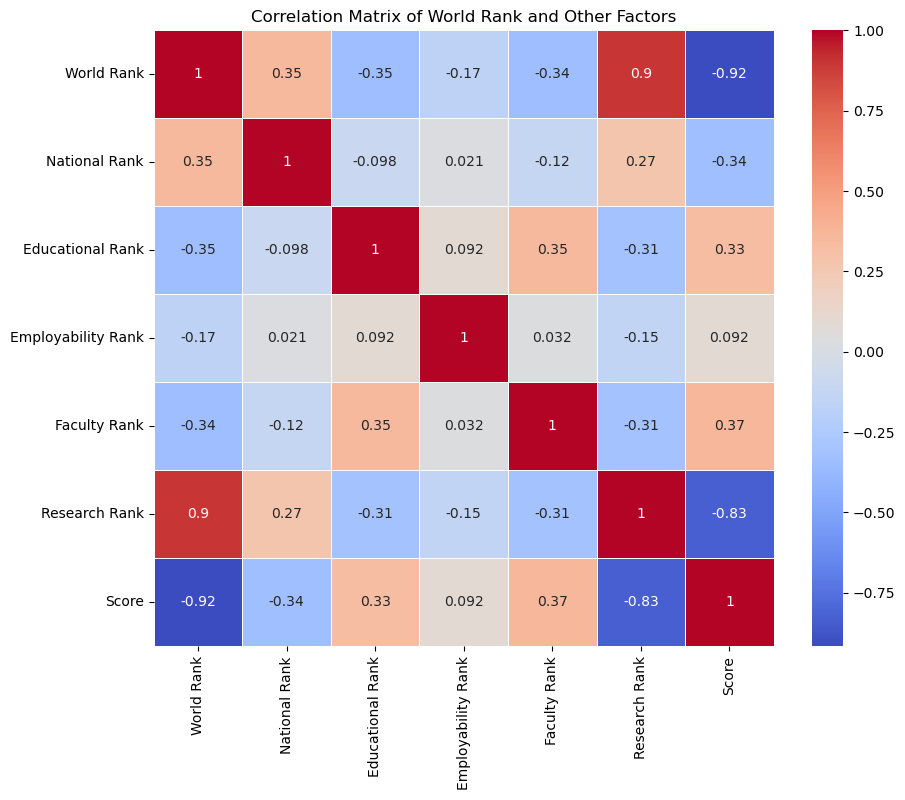

In [270]:
#check World rank dataset
#Select relevant columns for the correlation
columns_to_analyze = ['World Rank', 'National Rank', 'Educational Rank', 
                      'Employability Rank', 'Faculty Rank', 'Research Rank','Score']
df_selected = word_rank[columns_to_analyze].dropna()

# Calculate correlation between factors and the overall ranking
correlation_matrix = df_selected.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of World Rank and Other Factors')
plt.show()

#### Insights:
##### Research Rank has the strongest impact on World Rank. The very high correlation (0.897) indicates that research quality is a dominant factor in determining a university’s overall ranking.

##### Score and World Rank (-0.916): This strong negative correlation indicates that as the score increases, the world rank tends to decrease.

##### Educational Rank and Faculty Rank also influence the World Rank, but their impact is moderate. These factors likely affect a university’s reputation, but not as much as research.

##### Employability Rank has the weakest relationship with World Rank. While employability is important, it seems to play a smaller role in global university rankings compared to academic factors like research.

##### National Rank has a moderate positive correlation with World Rank, meaning that a university’s performance at the national level influences its global position, but not as much as research or education.

                              Rank  sdg-score-multi__value  \
Rank                      1.000000               -0.777622   
sdg-score-multi__value   -0.777622                1.000000   
sdg-score-multi__value 2 -0.699135                0.612119   
sdg-score-multi__value 3 -0.637788                0.538907   
sdg-score-multi__value 4 -0.811228                0.639149   
scores                   -0.991224                0.773546   

                          sdg-score-multi__value 2  sdg-score-multi__value 3  \
Rank                                     -0.699135                 -0.637788   
sdg-score-multi__value                    0.612119                  0.538907   
sdg-score-multi__value 2                  1.000000                  0.460883   
sdg-score-multi__value 3                  0.460883                  1.000000   
sdg-score-multi__value 4                  0.578157                  0.540560   
scores                                    0.698532                  0.640377   

    

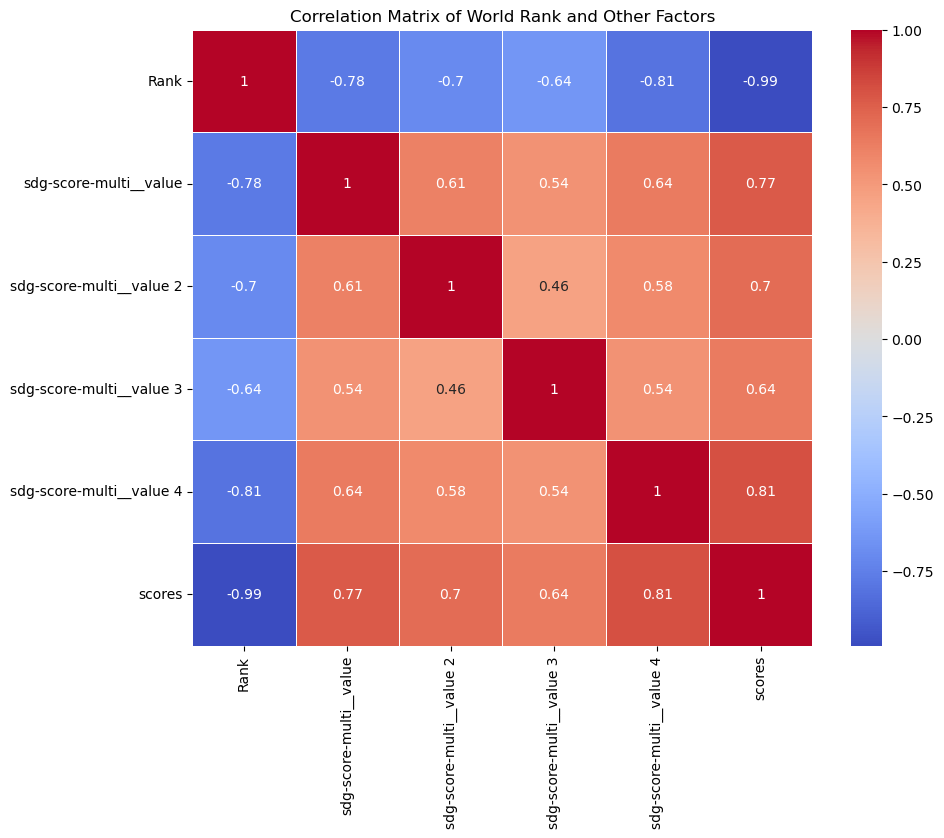

In [375]:
# Check the Times higher education 
# Select relevant columns for the correlation
columns_to_analyze = ['Rank','sdg-score-multi__value',
       'sdg-score-multi__value 2', 
       'sdg-score-multi__value 3', 'sdg-score-multi__value 4','scores']
df_selected = times_h_test[columns_to_analyze].dropna()

# Calculate correlation between factors and the overall ranking
correlation_matrix = df_selected.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of World Rank and Other Factors')
plt.show()

##### Matrix shows the strongest negative correlation between Rank and SDG Score Value 4. The correlation is quite high, suggesting that this specific SDG metric has a major influence on the overall university rank.

##### There is a strong negative correlation between the Rank and SDG Score Value. This means that as the SDG score improves (higher value), the Rank tends to improve (lower rank, closer to the top).

##### There is also a strong negative correlation between the Rank and SDG Score Value 2, indicating that as SDG performance in the second metric improves, the overall rank also tends to improve.

##### Similarly, there is a moderate negative correlation between Rank and SDG Score Value 3. The trend continues here, showing that improvements in sustainability metrics correlate with better rankings.

##### insights: This SDG value 4  dimension (likely an important factor) is strongly linked to rank improvement. Universities excelling in this specific area of SDG performance tend to have much higher rankings.

**numerical & numerical --> (Scatter plot, line chart)**

#### Bounes :How do the different ranking criteria (Rank, Ranking, and World Rank) correlate with each other, and what does this reveal about their relationships in evaluating university performance?

In [284]:
# Standardize university names across all datasets
times_h_test['University'] = times_h_test['University Name '].str.strip().str.lower()
shanghai_rank['University'] = shanghai_rank['University Name'].str.strip().str.lower()
word_rank['University'] = word_rank['University Names'].str.strip().str.lower()

In [285]:
# Convert university names to sets (we used sets in the comparison because sets are efficient when it comes to checking for common or unique elements across multiple datasets. )for comparison
set_times_higher = set(times_h_test['University'])
set_shanghai = set(shanghai_rank['University'])
set_world_rank = set(word_rank['University'])

# Universities common across all datasets
common_universities = set_times_higher & set_shanghai & set_world_rank

# Universities present in Times Higher Education but missing in Shanghai or World Rank
only_in_times_higher = set_times_higher - (set_shanghai | set_world_rank)

# Universities present in Shanghai but missing in Times Higher Education or World Rank
only_in_shanghai = set_shanghai - (set_times_higher | set_world_rank)

# Universities present in World Rank but missing in the other two datasets
only_in_world_rank = set_world_rank - (set_times_higher | set_shanghai)

# Display results
print("Common universities across all datasets:", len(common_universities))
print("Universities only in Times Higher Education:", len(only_in_times_higher))
print("Universities only in Shanghai Ranking:", len(only_in_shanghai))
print("Universities only in World Rank:", len(only_in_world_rank))


Common universities across all datasets: 249
Universities only in Times Higher Education: 1063
Universities only in Shanghai Ranking: 209
Universities only in World Rank: 952


In [286]:
# Convert the result to DF for easier handling
common_universities_df = pd.DataFrame(list(common_universities), columns=['University'])
only_in_times_higher_df = pd.DataFrame(list(only_in_times_higher), columns=['University'])
only_in_shanghai_df = pd.DataFrame(list(only_in_shanghai), columns=['University'])
only_in_world_rank_df = pd.DataFrame(list(only_in_world_rank), columns=['University'])

# Save the reports as CSV
common_universities_df.to_csv('common_universities.csv', index=False)
only_in_times_higher_df.to_csv('only_in_times_higher.csv', index=False)
only_in_shanghai_df.to_csv('only_in_shanghai.csv', index=False)
only_in_world_rank_df.to_csv('only_in_world_rank.csv', index=False)

In [287]:
# Merge datasets on university names
merged_df = pd.merge(times_h_test, shanghai_rank, on='University', suffixes=('_Times', '_Shanghai'))
merged_df = pd.merge(merged_df, word_rank, on='University', suffixes=('', '_World'))
merged_df.columns

Index(['Rank', 'University Name ', 'Location', 'sdg-score-multi__number',
       'sdg-score-multi__value', 'sdg-score-multi__number 2',
       'sdg-score-multi__value 2', 'sdg-score-multi__number 3',
       'sdg-score-multi__value 3', 'sdg-score-multi__value 4', 'scores',
       'University', 'Ranking', 'University Name', 'National/Regional Rank',
       'Total Score', 'World Rank', 'University Names', 'Location ',
       'National Rank', 'Educational Rank', 'Employability Rank',
       'Faculty Rank', 'Research Rank', 'Score', 'World Rank Percentage'],
      dtype='object')

In [288]:
# Remove non-numeric characters (e.g., '=', ',', etc.)
merged_df['Rank'] = merged_df['Rank'].astype(str).str.replace(r'\D', '', regex=True)

# Convert the cleaned column to integer
merged_df['Rank'] = pd.to_numeric(merged_df['Rank'], errors='coerce').fillna(-1).astype(int)

merged_df['Ranking'] = merged_df['Ranking'].astype(str).str.replace(r'\D', '', regex=True)
merged_df['Ranking'] = pd.to_numeric(merged_df['Ranking'], errors='coerce').fillna(-1).astype(int)

merged_df['World Rank'] = pd.to_numeric(merged_df['World Rank'].astype(str).apply(lambda x: x.split('T', 1)[0]))

merged_df
merged_df.to_csv('merged.csv', index=False)

In [379]:
# Print to verify
print(merged_df['Rank'])

# Correlation between rankings
correlation = merged_df[['Rank', 'Ranking', 'World Rank']].corr()
print(correlation)

# Plot the correlation matrix using Plotly with a different colorscale
fig = px.imshow(correlation, text_auto=True, aspect="auto", title="Correlation Matrix of Rankings", color_continuous_scale='speed')
fig.show()

0         1
1         5
2         7
3         7
4         9
       ... 
244    1001
245    1001
246    1001
247    1001
248    1001
Name: Rank, Length: 249, dtype: int32
                Rank   Ranking  World Rank
Rank        1.000000  0.414025    0.392431
Ranking     0.414025  1.000000    0.819443
World Rank  0.392431  0.819443    1.000000


#### The correlation between the pairs of rankings. indicate that :

###### Diagonal values (1.000000): represent the self-correlation of each ranking system, which is always 1.

###### Off-diagonal values: These indicate the correlation between the ranking systems:
The correlation between Times Higher education Ranking and shanghai Ranking is approximately 0.159, suggesting a weak positive correlation.
The correlation between Times Higher education Ranking and World Rank is approximately 0.152, also indicating a weak positive correlation.
The correlation between shanghai Ranking and World Rank is about 0.439, which suggests a moderate positive correlation.
Overall, it seems that the shanghai Ranking system has a somewhat stronger relationship with the World Rank than Times Higher education Ranking.
####  Shanghai and World Rank are the most closely related. This may suggest that these two metrics assess similar aspects of university performance, while Times Higher education could reflect different criteria or metrics

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [372]:
word_rank

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score,World Rank Percentage,University
0,1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0,0.1,harvard university\n cwur rating system: ed...
1,2,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7,0.1,massachusetts institute of technology\n educa...
2,3,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2,0.1,stanford university\n education: a+; employab...
3,4,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1,0.1,university of cambridge\n education: a+; empl...
4,5,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3,0.1,university of oxford\n education: a+; employa...
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,-1,-1,-1,1917,66.0,9.8,chongqing jiaotong university
1996,1997,University of Arkansas at Little Rock,USA,332,-1,1322,-1,1920,66.0,9.8,university of arkansas at little rock
1997,1998,Van Yüzüncü Yıl University,Turkey,54,-1,-1,-1,1919,66.0,9.8,van yüzüncü yıl university
1998,1999,Bharathidasan University,India,64,-1,-1,-1,1922,66.0,9.8,bharathidasan university


In [371]:
df_ksa = word_rank[word_rank["Location "] == "Saudi Arabia"][:10]

# Plot histogram of universities in Saudi Arabia and their scores using Plotly
fig = px.bar(df_ksa, x='Score', y='University Names', orientation='h', title='Scores of Universities in Saudi Arabia')
fig.update_layout(xaxis_title='Score', yaxis_title='University Name', yaxis=dict(categoryorder='total ascending'))
fig.show()

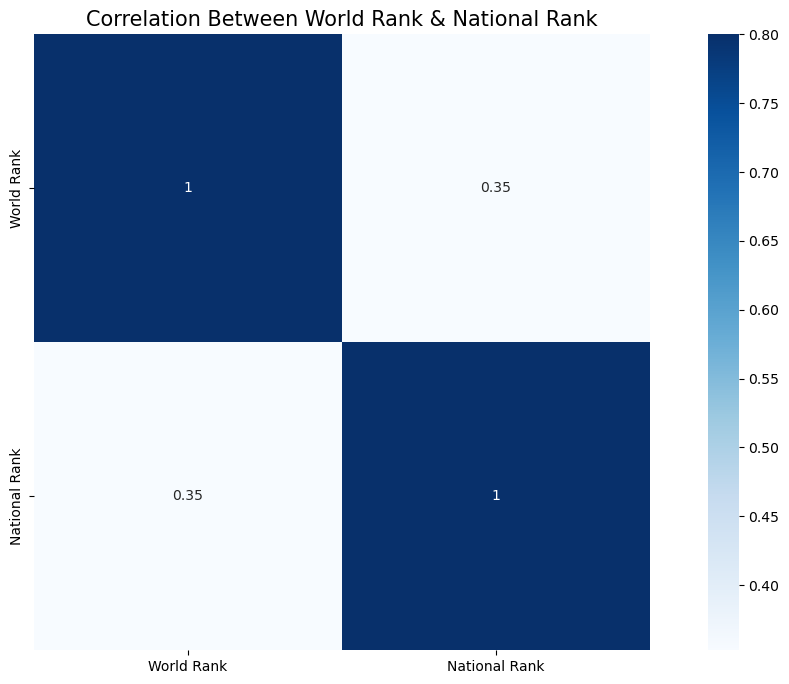

In [365]:
df_corr= word_rank[["World Rank","National Rank"]]
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df_corr.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Correlation Between World Rank & National Rank',fontsize=15);

In [369]:
rank_country = word_rank[["World Rank","University Names","Location "]]
top_500_rank = rank_country.loc[:499,["University Names","Location ","World Rank"]]
top_10_countries = top_500_rank["Location "].value_counts().iloc[0:10]

fig = px.bar(top_10_countries, 
             x=top_10_countries.index, 
             y=top_10_countries.values, 
             title="Countries With The Highest Number of Universities At The Top 500",
             labels={'x': 'Countries', 'y': 'Frequency'})

fig.update_layout(xaxis_title='Countries', yaxis_title='Frequency')
fig.show()

#### Insight
The chart reveals that the top 500 universities are concentrated in a few countries, particularly the USA and China, while other nations contribute relatively fewer universities.

In [393]:
# Bonus 
# Q: Which are the top 10 Arab countries that have been ranked globally, and what are their respective rankings?
arab_countries = [
    "Algeria", "Bahrain", "Comoros", "Djibouti", "Egypt", "Iraq", "Jordan", "Kuwait", "Lebanon", "Libya",
    "Mauritania", "Morocco", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Somalia", "Sudan", "Syria",
    "Tunisia", "United Arab Emirates", "Yemen"
]
arab_rankings = word_rank[word_rank['Location '].isin(arab_countries)]
top_10_arab_rankings = arab_rankings.sort_values(by='World Rank').head(10)
# Select only the columns: University, World Rank, and Country (location)
top_10_arab_rankings = top_10_arab_rankings[['University Names', 'World Rank', 'Location ']]

# Display the top 10 Arab universities with the selected columns
top_10_arab_rankings

,University Names,World Rank,Location
244,King Abdulaziz University,245,Saudi Arabia
278,King Abdullah University of Science and Techno...,279,Saudi Arabia
351,King Saud University,352,Saudi Arabia
519,Cairo University,520,Egypt
656,King Fahd University of Petroleum and Minerals,657,Saudi Arabia
713,American University of Beirut,714,Lebanon
771,Ain Shams University,772,Egypt
870,Qatar University,871,Qatar
890,Mansoura University,891,Egypt
891,Khalifa University,892,United Arab Emirates
